# Initiering

In [2]:
% reset
# Initiering
# Import packages
import json
import sympy
import numpy
import matplotlib.pyplot as plt
from sympy import *
from matplotlib.pyplot import *
init_printing()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# AD-AS modellen

In [3]:
# Declaring variables
## Endogenous
Y, C, I, G, Ld, Ms, P, M, NX, R, IM, EX, E, Ee, W, u, L, N = sympy.symbols('Y C I G L_d M_s  P M NX R IM EX E Ee W u L N')
## Parametere og konstantledd
oC, c1, b, oI, k, h, t, m, m1, m2, x1, x2, P, Ps, l1, l2, mu, alpha, A, Ac = sympy.symbols('oC c_1 b oI k h t m m1 m2 x1 x2 P Ps l_1 l_2 mu alpha A Ac')
## Exogene styringsvariableh
oG, i, T, Ys, rp, i_s, Pe, z = sympy.symbols('oG i T Ys rp i_s Pe z')

In [4]:
beforems = set(dir())
## Markeder
### Varemarkedet
EQV = Eq(Y, C + I + G + NX)
### Pengemarkedet
EQM = Eq(Ld, Ms)
### Valutakursmarkedet
EQU = Eq((1+i),(1+i_s)*(Ee/E))
#### Tilbud av arbeidskraft
#LS = Eq(W,Pe*(l1*u + l2*z))
LS = Eq(W,Pe*(Ac+l1*u))

## Aktører
### Husholdningero
#### Konsumfunksjon
CD = Eq(C,oC + c1*(Y-T))
CDI = Eq(IM, -m1*R + m2*Y)
#### Pengeetterspørsel
LD = Eq(Ld,k*Y-h*i)
### Bedrifter
YS = Eq(Ys, Y)
PF = Eq(Y, A*L*alpha)
PS = Eq(P, (1+mu)*W)
YSE = Eq(EX, x1*R + x2*Ys)
#### Investeringer
ID = Eq(Id,oI - b*i)
### Offentlig myndigheter
GD = Eq(G, oG)
TR = Eq(T, t*Y)
### Sentralbanken
MS = Eq(Ms,M/P)

### Definisjoner
DRE = Eq(R,(E*Ps)/P)
DNX = Eq(NX,EX-R*IM)
DLE = Eq(u, 1 - (L/N))


#RNX = DNX.subs([(EX,solve(YSE,EX)[0]),(IM,solve(CDI,IM)[0])])
RNX = DNX.subs([(R,solve(DRE,R)[0]), (IM, solve(CDI.subs([(R,solve(DRE,R)[0])]), IM) [0]),(EX, solve(YSE.subs([(R,solve(DRE,R)[0])]), EX)[0])])

## Løsning av modellen fast kurs
FastBoP =  Eq(i,solve(EQU.subs([(E,Ee)]),i)[0]+rp)
FastISC = Eq(Y,solve(EQV.subs([(G, solve(GD, G)[0]),(C,solve(CD.subs(T,solve(TR,T)[0]),C)[0]), (I, solve(ID, Id)[0]), (NX, solve(RNX, NX)[0])]), Y)[0])
FastLMC = Eq(Y,solve(EQM.subs([(Ms, solve(MS,Ms)[0]),(Ld,solve(LD,Ld)[0])]),Y)[0])
SEQFasti = Eq(i,solve(EQU,i)[0])
SEQFastY = FastISC.subs(i,solve(EQU,i)[0])

### Flytende
FlytBoP = Eq(E,solve(EQU, E)[0])
FlytISC = Eq(Y,solve(EQV.subs([(G, solve(GD, G)[0]),(C,solve(CD.subs(T,solve(TR,T)[0]),C)[0]), (I, solve(ID, Id)[0]), (NX, solve(RNX, NX)[0])]), Y)[0])
FlytLMC = Eq(Y,solve(EQM.subs([(Ms, solve(MS,Ms)[0]),(Ld,solve(LD,Ld)[0])]),Y)[0])
FlytISCBoP = FlytISC.subs(E,solve(FlytBoP,E)[0])
SEQFlytY = FlytISCBoP.subs([(i,solve(FlytLMC,i)[0]),(E,solve(FlytBoP,E)[0])])
#SEQFlyti = solve(FlytLMC,i)[0].subs(Y,solve(SEQFlytY,Y)[0])

## AS-kurven
AS = PS.subs([(W, solve(LS,W)[0]),(u,solve(DLE.subs(L,solve(PF,L)[0]),u)[0])])
IAS = Eq(Y,solve(AS,Y)[0])
afterms = set(dir())

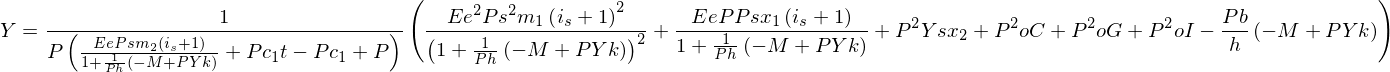

In [7]:
SEQFastY
SEQFlytY 

In [5]:
modvardict = list(afterms - beforems)
modvardict.remove('beforems')
#
modlatequ = dict()
modequ = dict()

for teller in range(0,len(modvardict)):
    eqvar = modvardict[teller]
    modlatequ[eqvar] = latex(eval(modvardict[teller]))
    modequ[eqvar] = str(eval(modvardict[teller]).rhs)
   
expdeftex = open('adasotex.json', 'w')
json.dump(modlatequ,expdeftex)
expdeftex.close()
expdefequ = open('adasoequ.json', 'w')
json.dump(modequ,expdefequ)
expdefequ.close()
modvardict

['EQV',
 'LD',
 'ID',
 'AS',
 'GD',
 'SEQFlytY',
 'CD',
 'PS',
 'LS',
 'FlytBoP',
 'FlytISC',
 'FlytISCBoP',
 'MS',
 'IAS',
 'YSE',
 'FastLMC',
 'DNX',
 'EQM',
 'DLE',
 'FastISC',
 'SEQFasti',
 'SEQFastY',
 'DRE',
 'TR',
 'PF',
 'CDI',
 'FlytLMC',
 'FastBoP',
 'RNX',
 'YS',
 'EQU']